<a href="https://colab.research.google.com/github/EnFiore/ai-machine-learning-modelli-e-algoritmi/blob/main/4%20-%20SVM/kernel_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVM

### Importiamo i moduli

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Definiamo le costanti


In [ ]:
RANDOM_SEED = 0

### Definiamo le funzioni

In [ ]:
def plot_decision_boundary(model, train_set, test_set, sv=None):

    #plt.figure(figsize=figsize)

    if(model):
        X_train, Y_train = train_set
        X_test, Y_test = test_set
        X = np.vstack([X_train, X_test])
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                             np.arange(y_min, y_max, .02))

        if hasattr(model, "predict_proba"):
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        else:
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=.8)

    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
    plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, alpha=0.6)

    if sv is not None:
      plt.scatter(sv[:, 0], sv[:, 1], c="blue",  edgecolor='white')

    plt.show()


In [ ]:
def classifier_report(model, data):
  X, y = data
  y_pred = model.predict(X)
  report = classification_report(y_pred, y)
  print(report)

### Generiamo il dataset

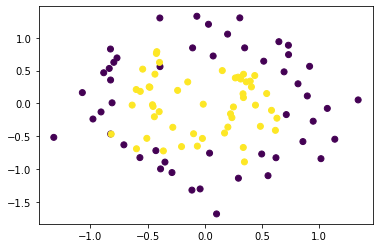

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.2, factor=0.5, random_state=RANDOM_SEED)
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

### Kernel Lineare

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="linear", probability=True) #aggiungiamo la probabilità per avere le sfumature in base alla probabilità
svc.fit(X_train, y_train)
classifier_report(svc, (X_test, y_test))

              precision    recall  f1-score   support

           0       0.38      0.55      0.44        11
           1       0.64      0.47      0.55        19

    accuracy                           0.50        30
   macro avg       0.51      0.51      0.49        30
weighted avg       0.54      0.50      0.51        30



visualizzo i risultati derivanti dal modello lineare

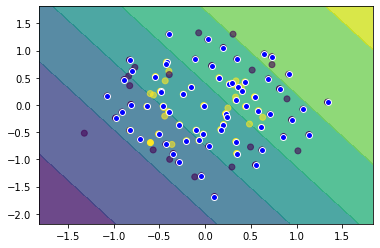

In [ ]:
plot_decision_boundary(svc, (X_train, y_train), (X_test, y_test), sv=svc.support_vectors_)

### Kernel Polinomiale

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="poly", probability=True)
svc.fit(X_train, y_train)
classifier_report(svc, (X_test, y_test))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61         7
           1       1.00      0.61      0.76        23

    accuracy                           0.70        30
   macro avg       0.72      0.80      0.68        30
weighted avg       0.87      0.70      0.72        30



visualizzo i risultati derivanti dal modello

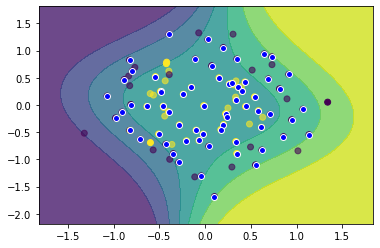

In [ ]:
plot_decision_boundary(svc, (X_train, y_train), (X_test, y_test), sv=svc.support_vectors_)

### Kernel Sigmoidale

da utilizzare quando il dataset ha andamento sigmoidale, cioè oscillante

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="sigmoid", probability=True)
svc.fit(X_train, y_train)
classifier_report(svc, (X_test, y_test))

              precision    recall  f1-score   support

           0       0.38      0.43      0.40        14
           1       0.43      0.38      0.40        16

    accuracy                           0.40        30
   macro avg       0.40      0.40      0.40        30
weighted avg       0.40      0.40      0.40        30



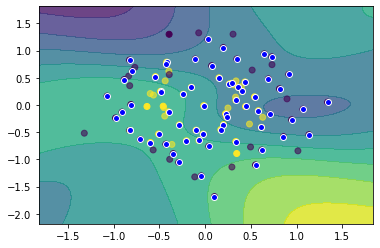

In [ ]:
plot_decision_boundary(svc, (X_train, y_train), (X_test, y_test), sv=svc.support_vectors_)

### Kernel Gaussiano (RBF)

potrebbe andare bene perchè si nota che i dati si concentrano versoil centro e si può immaginare una andamento gaussiano intorno al punto centrale

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf", probability=True)
svc.fit(X_train, y_train)
classifier_report(svc, (X_test, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



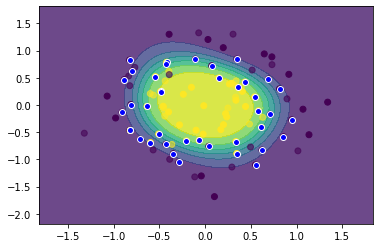

In [ ]:
plot_decision_boundary(svc, (X_train, y_train), (X_test, y_test), sv=svc.support_vectors_)